In [1]:
# dev (just pathing - ignore this)
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

# Topic Modelling: TopSBM

This is a topic modelling method using SBMs.

user starts with a corpus they don't really know.
- [ ] what are the topics involved?
- [ ] what are the make up of the entire corpus in terms of the topics?
        -> hover over: what are the words that make up the topics? + LM based phrase summary.
- [ ] for that topic, I want to select all the documents.
        -> then, use it for another workflow analysis. (req serialisation of corpus)
            1. select workflow and launch that notebook.

## Setup: Corpus

In [ ]:
from juxtorpus.corpus import Corpus, Corpora

corpora = Corpora()
corpora.widget()

In [2]:
# dev
import pandas as pd
from juxtorpus.corpus import Corpus, Corpora
from juxtorpus.corpus.meta import SeriesMeta
titles = pd.read_table("./tests/assets/topsbm/titles.txt", header=None)
corpus = Corpus.from_dataframe(pd.read_table("./tests/assets/topsbm/corpus.txt", header=None), col_doc=0)
corpus.add_meta(SeriesMeta(id_='title', series=titles.loc[:, 0]))
corpus.summary().T

,Name,Parent,Corpus Type,Number of Documents,Number of Total Words,Size of Vocabulary,mean Words per Document,min Words per Document,max Words per Document,metas
,pumpkin-echidna,,Corpus,63,31208,3071,495,14,5265,title


In [3]:
from juxtorpus.tm import TopSBM

tsbm = TopSBM(corpus, meta_title='title')
tsbm.build()

<NestedBlockState object, with base <BlockState object with 3134 blocks (73 nonempty), degree-corrected, for graph <Graph object, undirected, with 3134 vertices and 12060 edges, 2 internal vertex properties, 1 internal edge property, at 0x7fa7a899e6d0>, at 0x7fa7a8d79d30>, and 4 levels of sizes [(3134, 73), (73, 12), (12, 2), (2, 1)] at 0x7fa7a8d79fd0>


In [4]:
tsbm

<TopSBM on corpus:pumpkin-echidna from_dtm:tokens is_built:True>

In [14]:
# PMI > 0 co-occurs more frequently 
# PMI = 0 same as if they were independent. (no association)
# PMI < 0 does not co-occur frequently as compared to independently.
pmi_td_tw = pd.DataFrame(tsbm._model.pmi_td_tw())
pmi_td_tw

,0,1,2,3,4,5,6,7,8,9,...,2946,2947,2948,2949,2950,2951,2952,2953,2954,2955
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.446410
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(tsbm._model.words)

3071

In [8]:
len(corpus)

63

In [15]:
p_td_tw = tsbm._model.group_to_group_mixture(l=0)
p_td_tw  # n_td_tw[:Bd, Bd:] -> 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
pd.DataFrame(p_td_tw)

,0,1,2,3,4,5,6,7,8,9,...,2946,2947,2948,2949,2950,2951,2952,2953,2954,2955
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000127
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [14]:
p_td_tw.shape

(31, 3096)

In [17]:
len(list(tsbm._model.g.vertices()))

3134

In [10]:
len(corpus)

63

In [5]:
_ = tsbm.add_results_to_corpus()

In [6]:
_

{'custom_dtm_id': 'TopSBM/doctopic-from_dtm:tokens',
 'meta_ids': ['TopSBM_topic-0',
  'TopSBM_topic-1',
  'TopSBM_topic-2',
  'TopSBM_topic-3',
  'TopSBM_topic-4',
  'TopSBM_topic-5',
  'TopSBM_topic-6',
  'TopSBM_topic-7',
  'TopSBM_topic-8',
  'TopSBM_topic-9',
  'TopSBM_topic-10',
  'TopSBM_topic-11',
  'TopSBM_topic-12',
  'TopSBM_topic-13',
  'TopSBM_topic-14',
  'TopSBM_topic-15',
  'TopSBM_topic-16',
  'TopSBM_topic-17',
  'TopSBM_topic-18',
  'TopSBM_topic-19',
  'TopSBM_topic-20',
  'TopSBM_topic-21',
  'TopSBM_topic-22',
  'TopSBM_topic-23',
  'TopSBM_topic-24',
  'TopSBM_topic-25',
  'TopSBM_topic-26',
  'TopSBM_topic-27',
  'TopSBM_topic-28',
  'TopSBM_topic-29',
  'TopSBM_topic-30',
  'TopSBM_topic-31',
  'TopSBM_topic-32',
  'TopSBM_topic-33',
  'TopSBM_topic-34',
  'TopSBM_topic-35',
  'TopSBM_topic-36',
  'TopSBM_topic-37',
  'TopSBM_topic-38',
  'TopSBM_topic-39',
  'TopSBM_topic-40',
  'TopSBM_topic-41',
  'TopSBM_topic-42',
  'TopSBM_topic-43',
  'TopSBM_topic-44',


In [5]:
corpus._dtm_registry.keys()

dict_keys(['tokens', 'TopSBM/doctopic-from_dtm:tokens'])

In [6]:
topic_0 = corpus.slicer.filter_by_range('TopSBM_topic-0', min_=0.1)
topic_0._dtm_registry.keys()

dict_keys(['tokens', 'TopSBM/doctopic-from_dtm:tokens'])

In [7]:
len(topic_0)

38

In [8]:
topic_0._dtm_registry.get('TopSBM/doctopic-from_dtm:tokens')

<DTM 38 docs X 65 terms>

In [9]:
corpus._dtm_registry.get('TopSBM/doctopic-from_dtm:tokens')

<DTM 63 docs X 65 terms>

## Setup: Fit TopSBM

In [2]:
from topsbm.sbm import sbmtm

model = sbmtm()
model.make_graph(corpus.dtm.to_lists_of_terms(), documents=corpus.meta['title'].series.tolist())
_ = model.fit()

<NestedBlockState object, with base <BlockState object with 3134 blocks (85 nonempty), degree-corrected, for graph <Graph object, undirected, with 3134 vertices and 12060 edges, 2 internal vertex properties, 1 internal edge property, at 0x7fbf9b42d790>, at 0x7fbf9b704bb0>, and 4 levels of sizes [(3134, 85), (85, 16), (16, 2), (2, 1)] at 0x7fbf9b704370>


## What are the topics involved?
1. what are the topics involved?
    - [x] topic makeup
    - [ ] topic word summary based on top words.

In [3]:
# topics make up
# document -> max(topic)
def get_max(topic_dist: list[tuple[int, float]]) -> tuple[int, float]:
    return sorted(topic_dist, key=lambda item: item[1], reverse=True)[0]

topics = dict()
for i in range(len(model.documents)):
    topic, max_prob = get_max(model.topicdist(i))
    max_probs = topics.get(topic, list())
    max_probs.append(max_prob)
    topics[topic] = max_probs
    

topics_len = {topic: len(max_probs) for topic, max_probs in topics.items()}
topics.keys()

dict_keys([1, 2, 3, 44, 49, 32, 40, 43, 9, 26, 34, 47, 41, 11, 10, 12, 29, 8, 54, 7, 51, 45, 19, 20])

In [152]:
# remove columns where it's smaller than a fixed value (start with 0.1)
df = pd.DataFrame(p_w_tw, columns=model.words)
# df = df.T[df.sum(axis=0) > 0.1].T
df = df.T[df.T.gt(0.08).any(axis=1)].T

fig = go.Figure(data=[go.Bar(y=list(range(len(df))), x=df.loc[:, col], name=col, orientation='h') for col in df.columns])
fig.update_layout(
    barmode='stack', 
    yaxis=dict(nticks=len(df)),
    height=800,
)
fig.update_xaxes(categoryorder='category ascending')
fig_hbar_tw_w = fig

In [164]:
(p_w_tw[2, :] > 0).sum()

279

In [154]:
layout = pn.Row(
    pn.pane.Plotly(fig_pie_tw_d, width=500, height=1000),  # Pie chart for best topic % based on number of documents
    pn.pane.Plotly(fig_hbar_tw_w, width=800, height=1000), # HBar chart for topic-word distribution (threshold of 8%)
)

layout

Row
    [0] Plotly(Figure, height=1000, sizing_mode='fixed', width=500)
    [1] Plotly(Figure, height=1000, sizing_mode='fixed', width=800)

In [ ]:
# future: make Pie an interactive sunburst chart. (this can show the hierarchy as well)
# future: make HBar donut charts for each topic? https://plotly.com/python/sunburst-charts/

In [167]:
corpus.meta['title'].series

0            Nuclear_Overhauser_effect Chemical_physics
1                      Quantum_solvent Chemical_physics
2               Rovibrational_coupling Chemical_physics
3               Effective_field_theory Chemical_physics
4                     Chemical_physics Chemical_physics
                            ...                        
58                 Aureus_Sciences Experimental_physics
59    IEEE/ACM_Transactions_on_Computational_Biology...
60                 Knotted_protein Experimental_physics
61                          BioUML Experimental_physics
62    De_novo_transcriptome_assembly Experimental_ph...
Name: 0, Length: 63, dtype: object

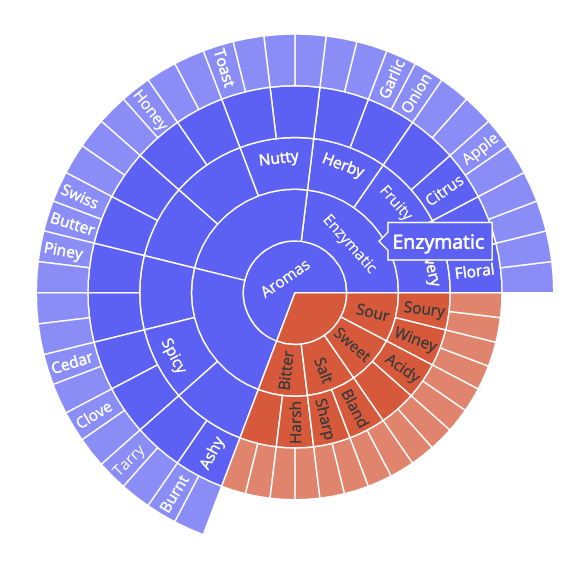

In [28]:
results = model.get_groups(l=0)
results['p_w_tw'].shape

(3071, 55)

In [179]:
results['p_tw_d'].T.sum(axis=0)

array([ 6.82238597,  1.46061818, 12.80146599,  1.51862271,  0.80386894,
        0.40964538,  0.49492422,  5.41770802,  1.98254152,  1.03700812,
        0.7491626 ,  0.55569446,  1.8553744 ,  0.69980832,  0.629477  ,
        0.798701  ,  0.3125867 ,  1.59513571,  1.81108238,  0.58667673,
        0.43896821,  0.55388603,  0.99530047,  0.42002779,  0.36046698,
        0.53121642,  0.92528784,  0.4779126 ,  0.46513026,  0.8726953 ,
        0.3407507 ,  1.08622727,  0.96598961,  0.64196478,  0.7478917 ,
        0.22754169,  0.53157699,  0.33155809,  0.20215307,  0.41514024,
        0.7645562 ,  0.96295002,  0.5420778 ,  0.44578329,  0.40996882,
        0.62219909,  0.55595105,  0.6964538 ,  0.29233432,  0.89247632,
        0.28567921,  0.44267204,  0.25261532,  0.84790099,  1.11220731])

In [198]:
p_tw_w = pd.DataFrame(results['p_tw_w'])
# results['p_tw_w'] / results['p_tw_w'].sum(axis=1)   # sums to the size of vocab.
p_tw_w.div(p_tw_w.sum(axis=1), axis=0)

,0,1,2,3,4,5,6,7,8,9,...,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070
0,0.5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.003584,0.003584,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [184]:
corpus.summary()

,
Name,poised-partridge
Parent,
Corpus Type,Corpus
Number of Documents,63
Number of Total Words,31208
Size of Vocabulary,3071
mean Words per Document,495
min Words per Document,14
max Words per Document,5265
metas,title


In [195]:
type(corpus.dtm._feature_names_out)

numpy.ndarray

In [192]:
df = pd.DataFrame(results['p_tw_d'])
df.values

array([[0.11403509, 0.09836066, 0.13101604, ..., 0.10738255, 0.06410256,
        0.05263158],
       [0.28947368, 0.        , 0.01336898, ..., 0.        , 0.        ,
        0.00223964],
       [0.19736842, 0.25136612, 0.23796791, ..., 0.1409396 , 0.16923077,
        0.28107503],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.03333333,
        0.00335946],
       [0.        , 0.        , 0.        , ..., 0.02684564, 0.02307692,
        0.0055991 ],
       [0.        , 0.        , 0.        , ..., 0.01342282, 0.20512821,
        0.0055991 ]])

In [169]:
model.topics()

{0: [('the', 0.9858287122612446), ('through', 0.014171287738755391)],
 1: [('electron', 0.10374149659863946),
  ('spin', 0.07993197278911565),
  ('electrons', 0.05952380952380952),
  ('effect', 0.05782312925170068),
  ('nuclear', 0.04931972789115646),
  ('polarization', 0.047619047619047616),
  ('cross', 0.027210884353741496),
  ('dnp', 0.025510204081632654),
  ('nucleus', 0.022108843537414966),
  ('shift', 0.022108843537414966)],
 2: [('that', 0.048288234414710716),
  ('are', 0.046195245926147405),
  ('this', 0.033338316639258486),
  ('can', 0.030946329795186127),
  ('from', 0.02870384212886829),
  ('used', 0.018089400508297205),
  ('not', 0.01779040215278816),
  ('such', 0.015996412019733893),
  ('these', 0.015547914486470324),
  ('other', 0.014501420242188668)],
 3: [('theory', 0.09812108559498957),
  ('approximation', 0.05010438413361169),
  ('interaction', 0.04384133611691023),
  ('effective', 0.033402922755741124),
  ('theories', 0.029227557411273485),
  ('hamiltonian', 0.0250521

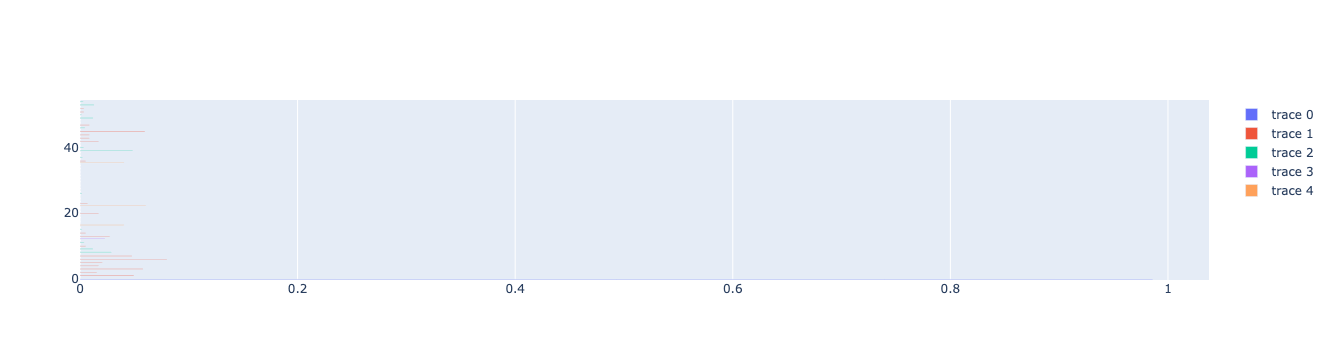

In [51]:
# topicw as a matrix (topic X term)
results = model.get_groups(l=0)
p_w_tw = results['p_w_tw'].T
p_w_tw_labels = [topic for topic in range(results['Bw'])]

In [122]:
df = pd.DataFrame(p_w_tw, columns=model.words)
# filter columns where there isn't a value > 0.1
df = df.T[df.T.gt(0.08).any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
the,0.985829,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
observed,0.000000,0.0,0.0,0.0,0.0,0.178571,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
magnetic,0.000000,0.0,0.0,0.0,0.0,0.000000,0.232955,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
resonance,0.000000,0.0,0.0,0.0,0.0,0.085714,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
spectroscopy,0.000000,0.0,0.0,0.0,0.0,0.128571,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
proteins,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
hydrometer,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
bioinformatics,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.245791,0.000000
folding,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228121,0.000000,0.000000


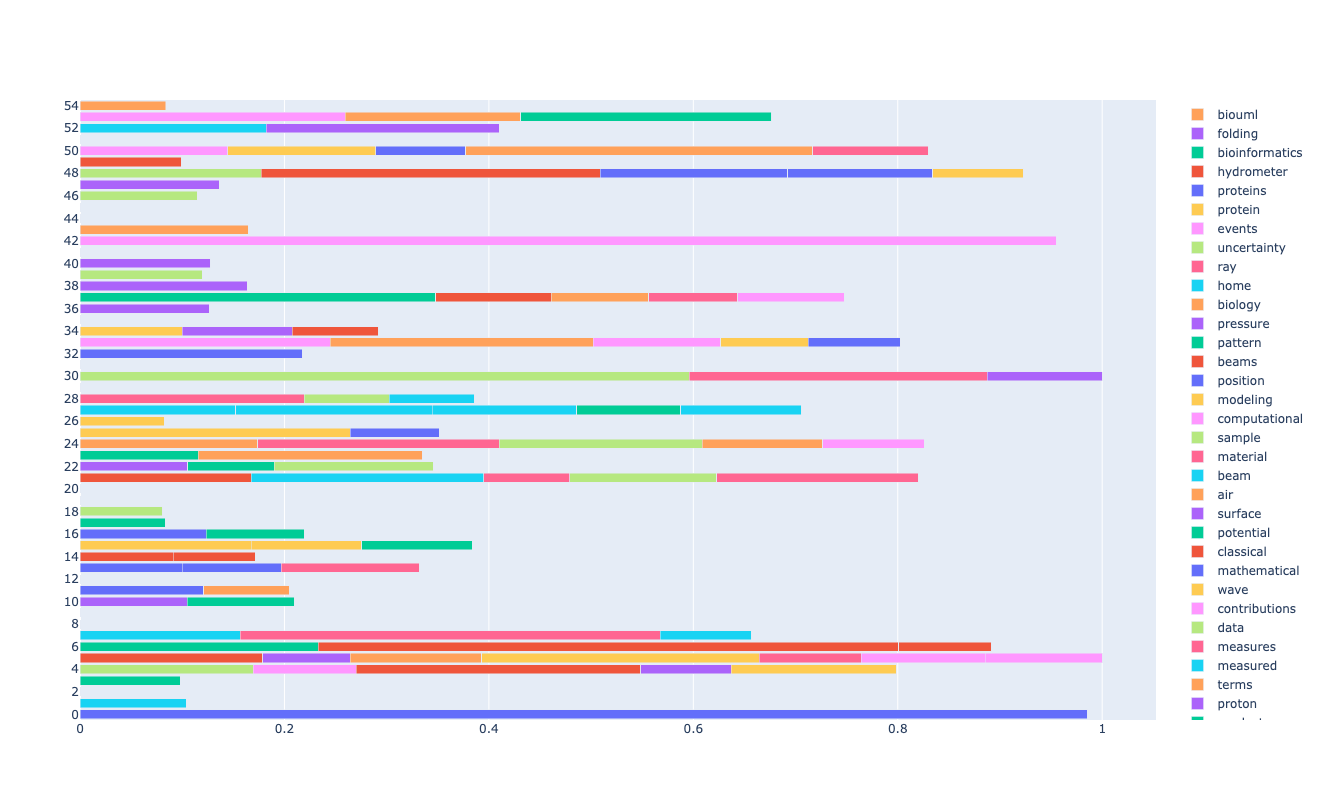

In [124]:
# remove columns where it's smaller than a fixed value (start with 0.1)
df = pd.DataFrame(p_w_tw, columns=model.words)
# df = df.T[df.sum(axis=0) > 0.1].T
df = df.T[df.T.gt(0.08).any(axis=1)].T

fig = go.Figure(data=[go.Bar(y=list(range(len(df))), x=df.loc[:, col], name=col, orientation='h') for col in df.columns])
fig.update_layout(
    barmode='stack', 
    yaxis=dict(nticks=len(df)),
    height=800,
)
fig.update_xaxes(categoryorder='category ascending')
fig

## Dev: LM-based independent term summary

In [5]:
# word summary based on top words in topic.
#    this can be a right subplot on the word distribution
#    LM-based word summary (bert unmask or gpt2 until EOS)

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

In [ ]:
model

In [ ]:
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate text
with torch.no_grad():  # Deactivate gradients to save memory
    output = model.generate(input_ids, max_length=3, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)

# Decode the output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

## Dev: bimodal topic detection

In [33]:
td = pd.DataFrame(model.topicdist(0))
td.sort_values(by=1, ascending=False).iloc[:5]

,0,1
1,1,0.171053
0,0,0.135965
3,3,0.135965
2,2,0.131579
4,4,0.087719


In [72]:
# get the max topic and find out how far it is from the median.
def dist_top_to_median(topic_idx: int, top_range=10) -> float:
    topic_dist = model.topicdist(topic_idx)
    df = pd.DataFrame(topic_dist)
    median = df[1].median()
    df = df.sort_values(by=1, ascending=False)
    
    dists = []
    for top in range(top_range):
        top = df[1].iloc[top]
        dist = top - median
        dists.append(dist)
    return tuple(dists)

dists = []
for i in range(len(model.documents)):
    dist = dist_top_to_median(topic_idx=i, top_range=10)
    dists.append(dist)

<Axes: xlabel='document', ylabel='dist from median'>

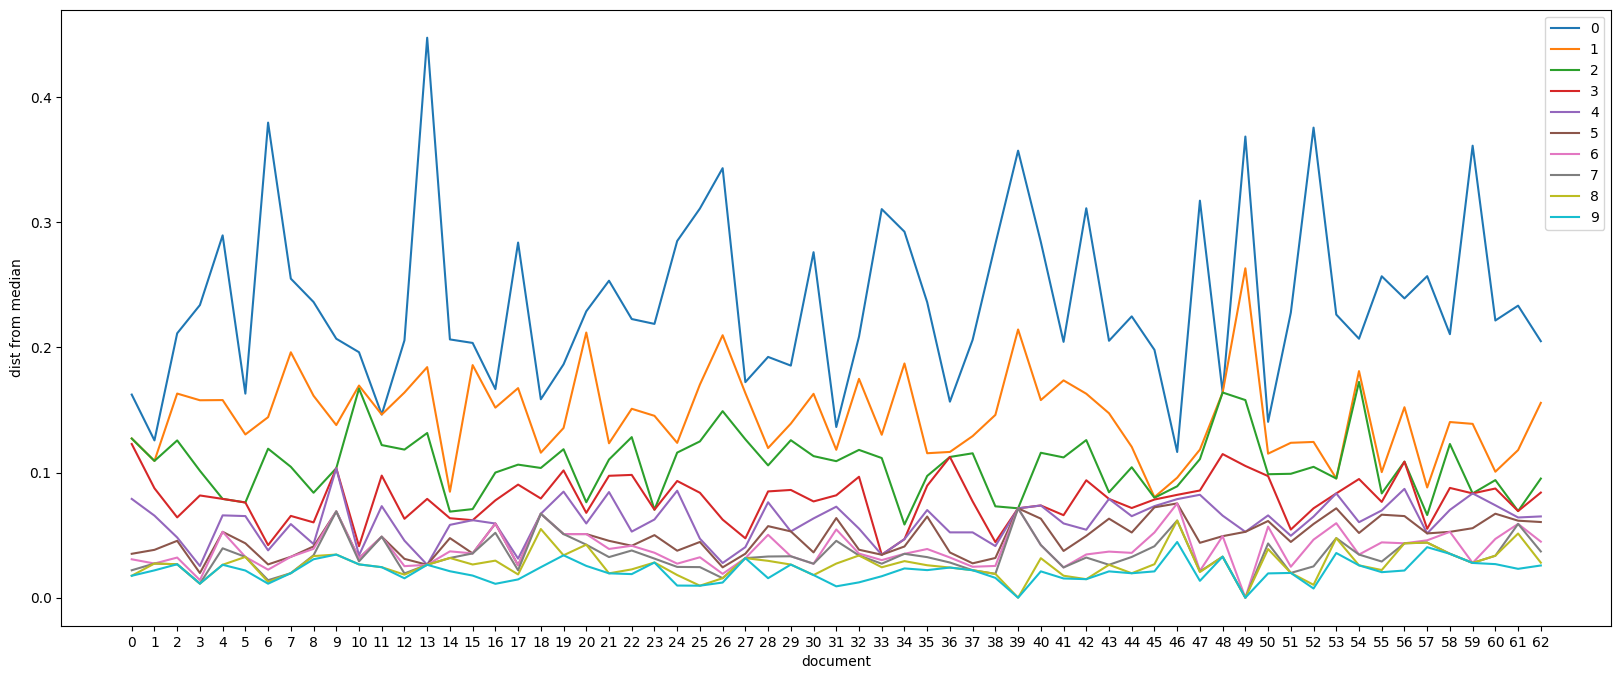

In [76]:
# %%timeit -n 1 -r 1

pd.DataFrame(dists).plot(xlabel='document', ylabel='dist from median', xticks=range(len(model.documents)), figsize=(20, 8))

In [74]:
def dist_from_next(topic_idx: int, top_range=10) -> float:
    topic_dist = model.topicdist(topic_idx)
    df = pd.DataFrame(topic_dist)
    df = df.sort_values(by=1, ascending=False)
    num_topics = len(df)
    assert top_range + 1 < num_topics
    
    dists = []
    for top_idx in range(top_range):
        top = df[1].iloc[top_idx]
        dist = top - df[1].iloc[top_idx+1]
        dists.append(dist)
    return tuple(dists)

dists_next = []
for i in range(len(model.documents)):
    dist = dist_from_next(topic_idx=i, top_range=3)
    dists_next.append(dist)

<Axes: xlabel='document', ylabel='dist from next'>

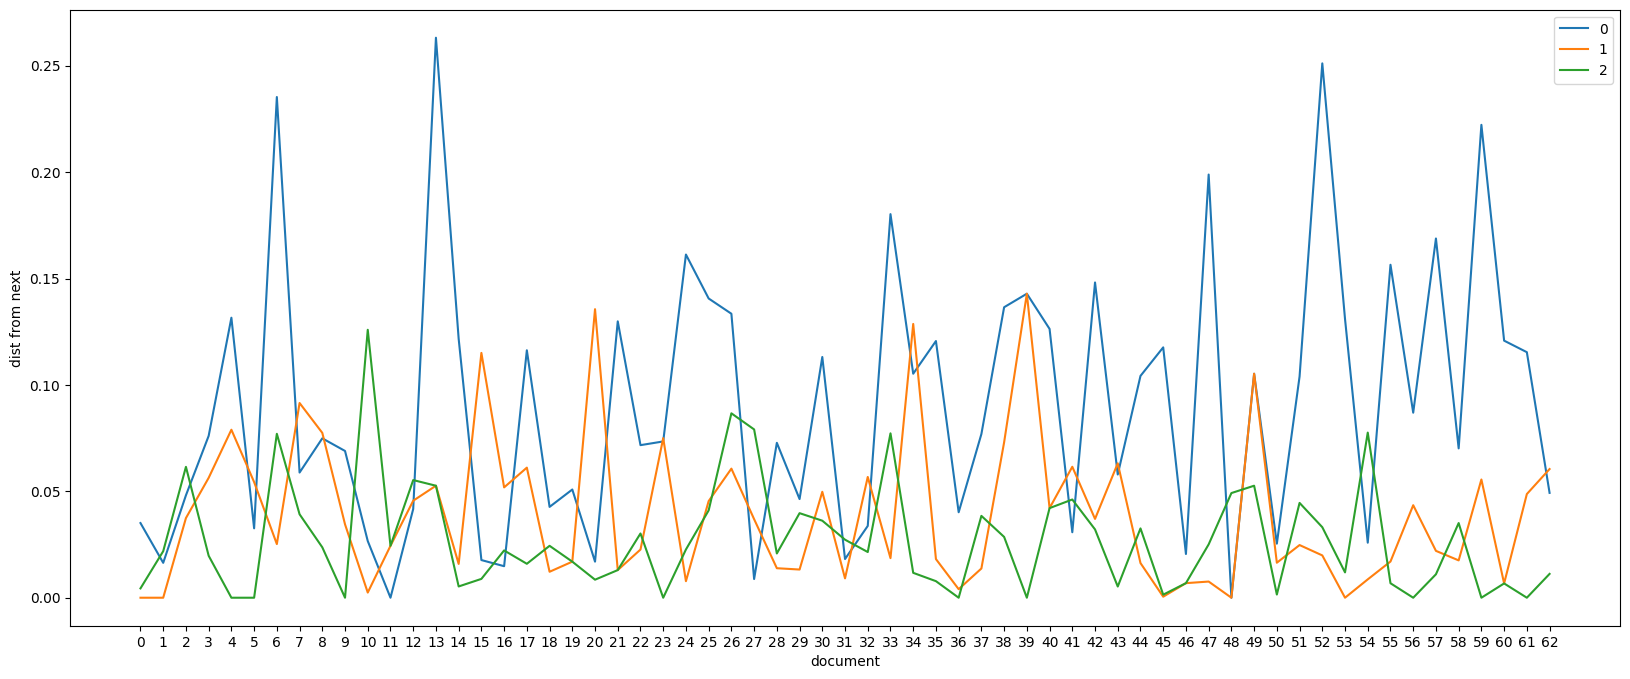

In [77]:
# if first distance is very high and second distance is low -> unimodal.
# if the first distance is high
pd.DataFrame(dists_next).plot(xlabel='document', ylabel='dist from next', xticks=range(len(model.documents)), figsize=(20, 8))

In [78]:
pd.DataFrame(dists_next).iloc[13]

0    0.263158
1    0.052632
2    0.052632
Name: 13, dtype: float64

<Axes: xlabel='document', ylabel='max prob'>

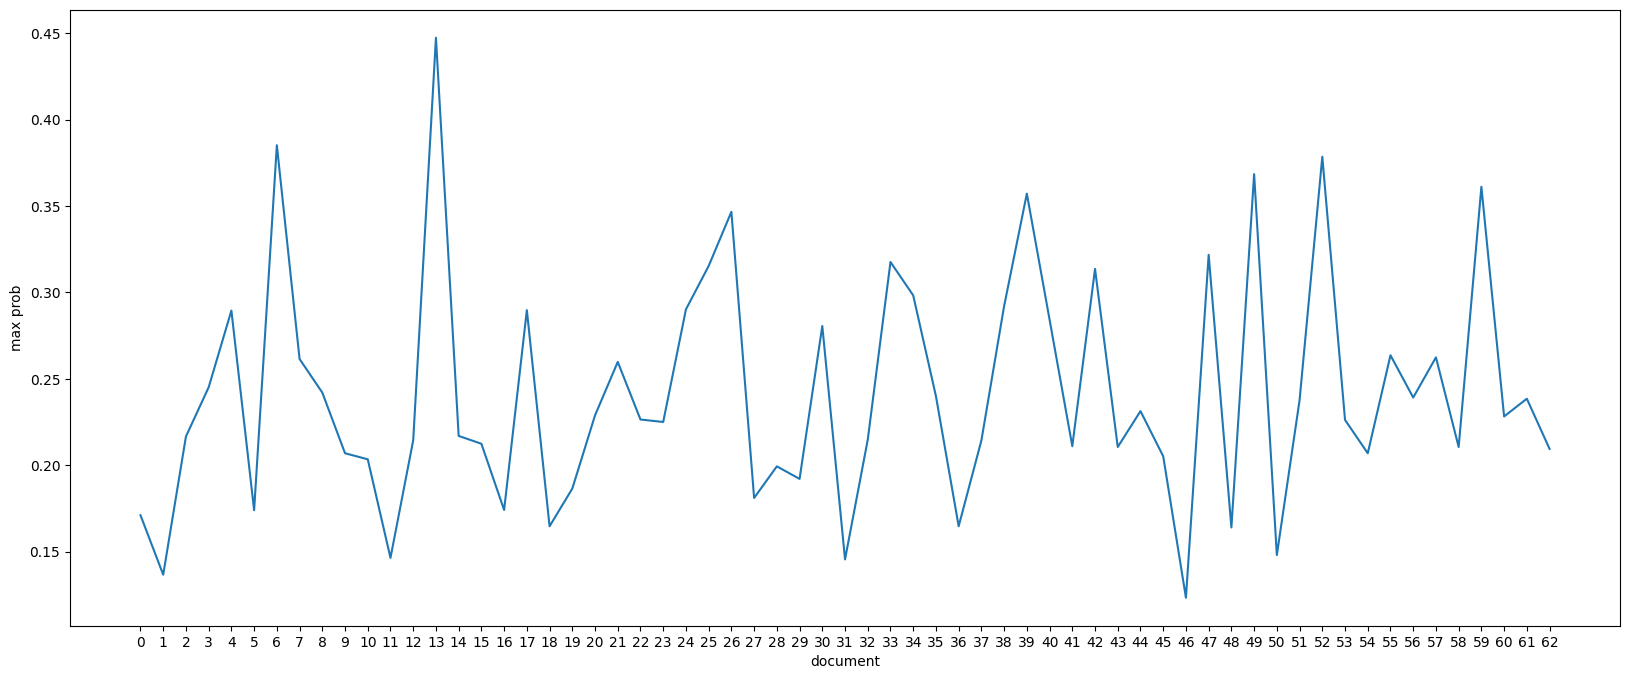

In [80]:
max_probs = []
for i in range(len(model.documents)):
    max_prob = pd.DataFrame(model.topicdist(i))[1].max()
    max_probs.append(max_prob)
    
pd.Series(max_probs).plot(xlabel='document', ylabel='max prob', xticks=range(len(model.documents)), figsize=(20, 8))

In [100]:
# how many word-groups are there?
import graph_tool.all as gt
state_l = model.state.project_level(0).copy(overlap=True)
ze = gt.ungroup_vector_property(state_l.get_edge_blocks(), [0,1])

word_groups = []
for e in model.g.edges():
    word_groups.append(ze[1][e])


f"Word Groups: {len(set(word_groups))}, Topics: {len(model.topicdist(i))}"

'Word Groups: 41, Topics: 41'

In [109]:
model.group_membership()[1].shape, len(model.documents)

((41, 3071), 63)

## Dev: Hierarchical Viz

To display the hierarchical nature of the topics from topSBM, use this: 
https://plotly.com/python/sankey-diagram/
+ Add words, Add opacity.

In [ ]:
from juxtor